In [152]:
#importing the Library
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [153]:
#importing the dataset 
df_cf=pd.read_csv("C:/Users/Admin/Documents/Coca_cola_Cashflow_statement.csv")

In [154]:
df_cf.head()

,DT,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
0,31-03-2009,-599,3923.0,-975.0,1295.0
1,30-06-2009,-565,623.0,-297.0,-2344.0
2,30-09-2009,-396,3394.0,-195.0,-1617.0
3,31-12-2009,-2589,3706.0,-1629.0,2113.0
4,31-03-2010,-1368,3889.0,-5326.0,704.0


In [155]:
#checking for null values
df_cf.isnull().sum()

DT                                     0
Cash_Flow_from_Investing_Activities    0
Cash Flow from Operating Activities    0
Cash Flow from Financial Activities    0
Net Cash Flow                          0
dtype: int64

In [156]:
df_cf.tail()

,DT,Cash_Flow_from_Investing_Activities,Cash Flow from Operating Activities,Cash Flow from Financial Activities,Net Cash Flow
49,30-06-2021,2034,1326.0,-1043.0,-1337.0
50,30-09-2021,166,1916.0,-1409.0,-1825.0
51,31-12-2021,-4684,2608.0,-1026.0,1199.0
52,31-03-2022,146,2789.0,-1675.0,831.0
53,30-06-2022,-1291,873.0,1817.0,2115.0


In [157]:
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DT                                   54 non-null     object 
 1   Cash_Flow_from_Investing_Activities  54 non-null     int64  
 2   Cash Flow from Operating Activities  54 non-null     float64
 3   Cash Flow from Financial Activities  54 non-null     float64
 4   Net Cash Flow                        54 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [158]:
# changing dt data type to datetime format
df_cf["DT"]=pd.to_datetime(df_cf["DT"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\905396716.py:2: UserWarning: Parsing '31-03-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\905396716.py:2: UserWarning: Parsing '30-06-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\905396716.py:2: UserWarning: Parsing '30-09-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\905396716.py:2: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cf["DT"]=pd.to_datetime(df_cf["DT"])
C:\Users\Admin\AppData\Local\Temp\ipyker

In [159]:
#setting dt as the index
df_cf.set_index("DT",inplace=True)

In [160]:
del df_cf["Cash_Flow_from_Investing_Activities"],df_cf["Cash Flow from Operating Activities"],df_cf["Cash Flow from Financial Activities"]

<AxesSubplot:xlabel='DT'>

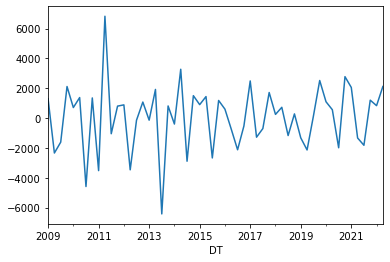

In [161]:
df_cf['Net Cash Flow'].plot()

In [162]:
from statsmodels.tsa.stattools import adfuller

In [163]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [164]:
adf_test(df_cf['Net Cash Flow'])

ADF Statistics: -0.730923066699619
p- value: 0.8385763706171556
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [165]:
## Use Techniques Differencing
df_cf['Net Cash Flow1']=df_cf['Net Cash Flow']-df_cf['Net Cash Flow'].shift(1)

In [166]:
df_cf.head()

,Net Cash Flow,Net Cash Flow1
DT,,
2009-03-31,1295.0,NaN
2009-06-30,-2344.0,-3639.0
2009-09-30,-1617.0,727.0
2009-12-31,2113.0,3730.0
2010-03-31,704.0,-1409.0


In [167]:
adf_test(df_cf['Net Cash Flow1'].dropna())

ADF Statistics: -5.452211014499717
p- value: 2.6290269886266513e-06
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [168]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

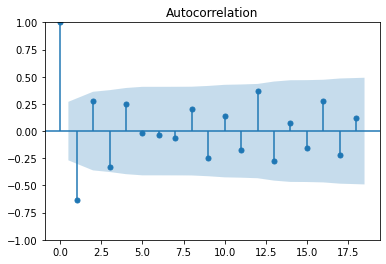

In [169]:
acf = plot_acf(df_cf["Net Cash Flow1"].dropna())

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


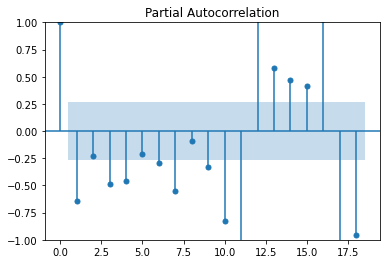

In [170]:
pacf12 = plot_pacf(df_cf["Net Cash Flow1"].dropna())

In [171]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2019,12,31)
test_dataset_end=datetime(2022,6,30)

In [172]:
train_data=df_cf[:train_dataset_end]
test_data=df_cf[train_dataset_end+timedelta(days=1):test_dataset_end]

In [173]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [174]:
test_data

,Net Cash Flow,Net Cash Flow1
DT,,
2020-03-31,1091.0,-1425.0
2020-06-30,558.0,-533.0
2020-09-30,-1992.0,-2550.0
2020-12-31,2774.0,4766.0
2021-03-31,2051.0,-723.0
2021-06-30,-1337.0,-3388.0
2021-09-30,-1825.0,-488.0
2021-12-31,1199.0,3024.0
2022-03-31,831.0,-368.0


In [175]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA

In [280]:
model_ARIMA=ARIMA(train_data['Net Cash Flow1'],order=(3,1,2))

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [281]:
model_Arima_fit=model_ARIMA.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [282]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Net Cash Flow1   No. Observations:                   44
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -394.214
Date:                Wed, 28 Sep 2022   AIC                            800.428
Time:                        13:43:01   BIC                            810.995
Sample:                    03-31-2009   HQIC                           804.325
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4335      0.234     -1.852      0.064      -0.892       0.025
ar.L2         -0.2363      0.266     -0.889      0.374      -0.757       0.285
ar.L3         -0.3731      0.143     -2.611      0.009      -0.653      -0.093
ma.L1         -1.9820      0.233     -8.494      0.000      -2.439      -1.525
ma.L2          0.9823      0.246      3.994      0.000       0.500       1.464
sigma2      3.689e+06   1.28e-07   2.87e+13      0.000    3.69e+06    3.69e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):                 1.60
Prob(Q):                              0.53   Prob(JB):                         0.45
Heteroskedasticity (H):               0.36   Skew:                            -0.33
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.14e+28. Standard errors may be unstable.
"""

In [283]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2020-03-31 00:00:00
2022-06-30 00:00:00


In [284]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Net Cash Flow1']-pred

In [285]:
pred

2020-03-31   -3107.988848
2020-06-30     -65.623172
2020-09-30    -134.717356
2020-12-31    1229.502864
2021-03-31    -480.683423
2021-06-30     -35.818938
2021-09-30    -333.579139
2021-12-31     328.451695
2022-03-31     -54.180803
2022-06-30      66.370692
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [286]:
residuals

DT
2020-03-31    1682.988848
2020-06-30    -467.376828
2020-09-30   -2415.282644
2020-12-31    3536.497136
2021-03-31    -242.316577
2021-06-30   -3352.181062
2021-09-30    -154.420861
2021-12-31    2695.548305
2022-03-31    -313.819197
2022-06-30    1217.629308
dtype: float64

<AxesSubplot:ylabel='Density'>

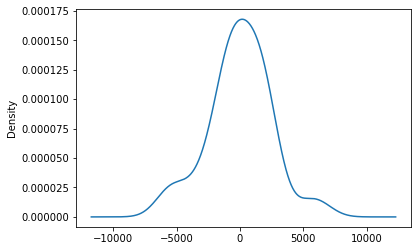

In [287]:
model_Arima_fit.resid.plot(kind='kde')

In [288]:
test_data['Predicted_ARIMA']=pred

C:\Users\Admin\AppData\Local\Temp\ipykernel_2488\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='DT'>

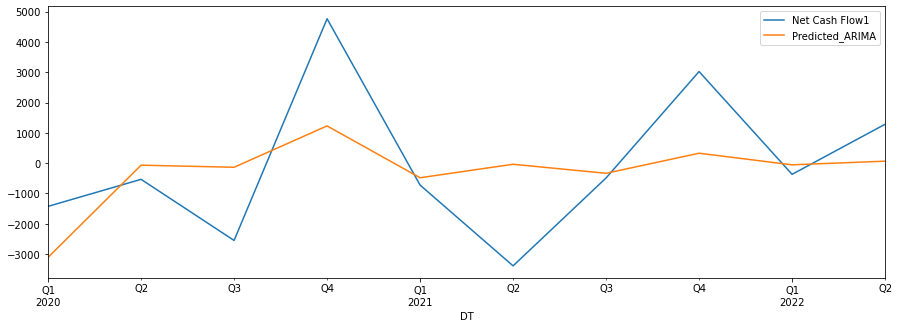

In [289]:
test_data[['Net Cash Flow1','Predicted_ARIMA']].plot(figsize=(15,5))

In [290]:
test_data

,Net Cash Flow,Net Cash Flow1,Predicted_ARIMA
DT,,,
2020-03-31,1091.0,-1425.0,-3107.988848
2020-06-30,558.0,-533.0,-65.623172
2020-09-30,-1992.0,-2550.0,-134.717356
2020-12-31,2774.0,4766.0,1229.502864
2021-03-31,2051.0,-723.0,-480.683423
2021-06-30,-1337.0,-3388.0,-35.818938
2021-09-30,-1825.0,-488.0,-333.579139
2021-12-31,1199.0,3024.0,328.451695
2022-03-31,831.0,-368.0,-54.180803


<AxesSubplot:xlabel='DT'>

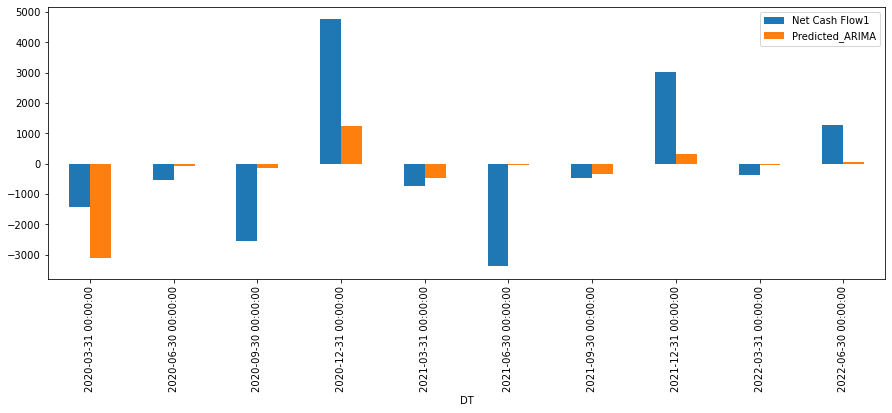

In [291]:
test_data[['Net Cash Flow1','Predicted_ARIMA']].plot.bar(figsize=(15,5))

In [292]:
from pandas.tseries.offsets import DateOffset
future_dates=[test_data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [293]:
future_dates

[Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-07-30 00:00:00'),
 Timestamp('2022-08-30 00:00:00'),
 Timestamp('2022-09-30 00:00:00'),
 Timestamp('2022-10-30 00:00:00'),
 Timestamp('2022-11-30 00:00:00'),
 Timestamp('2022-12-30 00:00:00'),
 Timestamp('2023-01-30 00:00:00'),
 Timestamp('2023-02-28 00:00:00'),
 Timestamp('2023-03-30 00:00:00'),
 Timestamp('2023-04-30 00:00:00'),
 Timestamp('2023-05-30 00:00:00'),
 Timestamp('2023-06-30 00:00:00'),
 Timestamp('2023-07-30 00:00:00'),
 Timestamp('2023-08-30 00:00:00'),
 Timestamp('2023-09-30 00:00:00'),
 Timestamp('2023-10-30 00:00:00'),
 Timestamp('2023-11-30 00:00:00'),
 Timestamp('2023-12-30 00:00:00'),
 Timestamp('2024-01-30 00:00:00'),
 Timestamp('2024-02-29 00:00:00'),
 Timestamp('2024-03-30 00:00:00'),
 Timestamp('2024-04-30 00:00:00'),
 Timestamp('2024-05-30 00:00:00')]

In [294]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=test_data.columns)

In [295]:
future_datest_df

,Net Cash Flow,Net Cash Flow1,Predicted_ARIMA
2022-07-30,NaN,NaN,NaN
2022-08-30,NaN,NaN,NaN
2022-09-30,NaN,NaN,NaN
2022-10-30,NaN,NaN,NaN
2022-11-30,NaN,NaN,NaN
2022-12-30,NaN,NaN,NaN
2023-01-30,NaN,NaN,NaN
2023-02-28,NaN,NaN,NaN
2023-03-30,NaN,NaN,NaN
2023-04-30,NaN,NaN,NaN


In [296]:
future_df=pd.concat([test_data,future_datest_df])

In [297]:
future_df

,Net Cash Flow,Net Cash Flow1,Predicted_ARIMA
2020-03-31,1091.0,-1425.0,-3107.988848
2020-06-30,558.0,-533.0,-65.623172
2020-09-30,-1992.0,-2550.0,-134.717356
2020-12-31,2774.0,4766.0,1229.502864
2021-03-31,2051.0,-723.0,-480.683423
2021-06-30,-1337.0,-3388.0,-35.818938
2021-09-30,-1825.0,-488.0,-333.579139
2021-12-31,1199.0,3024.0,328.451695
2022-03-31,831.0,-368.0,-54.180803
2022-06-30,2115.0,1284.0,66.370692


In [298]:
##prediction
pred_start_date=future_datest_df.index[0]
pred_end_date=future_datest_df.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-07-30 00:00:00
2024-05-30 00:00:00


In [299]:
pred_future=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Net Cash Flow1']-pred

In [300]:
pred_future

2022-09-30   -142.481748
2022-12-31     62.335421
2023-03-31    -22.088805
2023-06-30     44.038775
2023-09-30    -41.097373
2023-12-31     11.685285
2024-03-31    -15.753443
2024-06-30     15.434207
Freq: Q-DEC, Name: predicted_mean, dtype: float64

<AxesSubplot:>

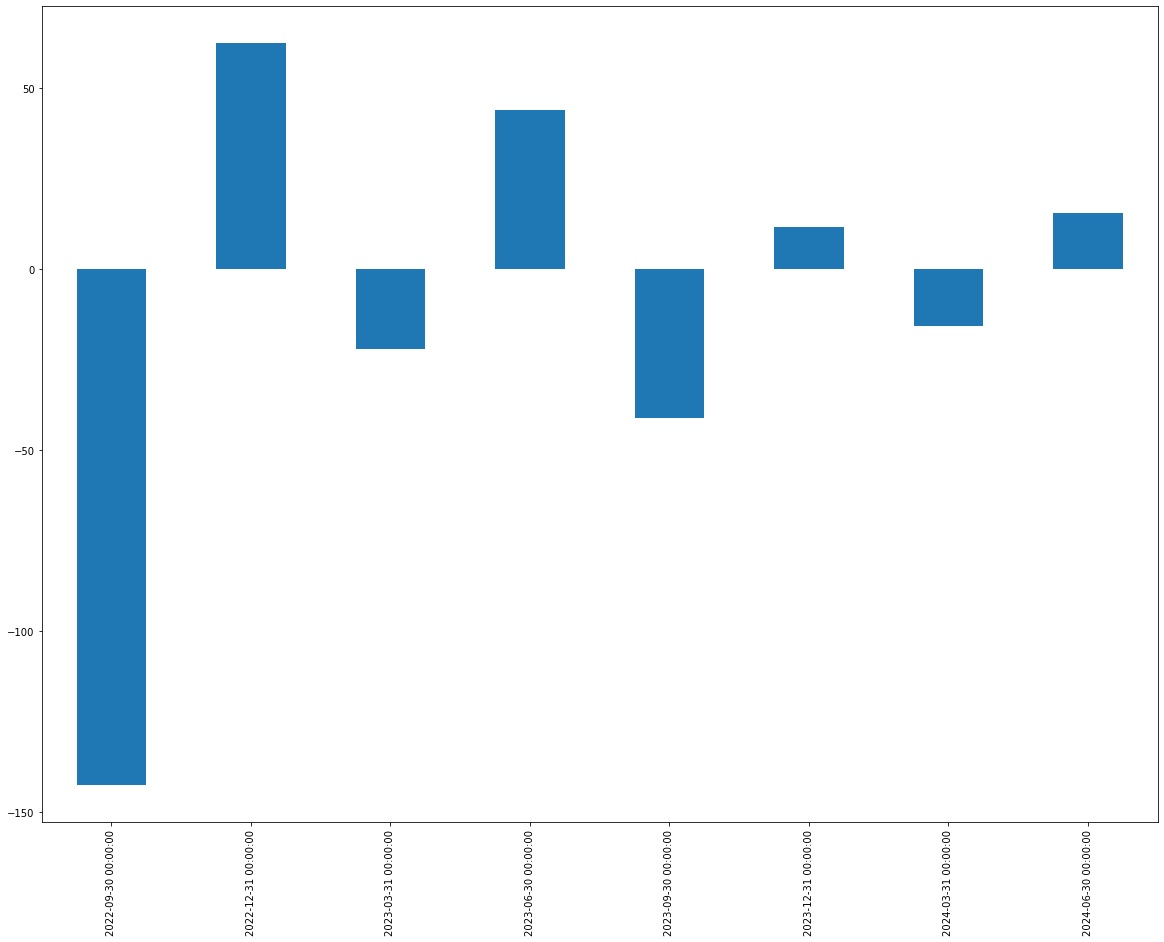

In [301]:
pred_future.plot.bar(figsize=(20,15))